# Project: Predicting Boston Housing Prices

## Getting Started
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, we will make a cursory investigation about the Boston housing data and provide our observations. 

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

###  Calculate Statistics
Let's start by calculating some descriptive statistics about the Boston housing prices. These statistics will be extremely important later on to analyze various prediction results from the constructed model.


In [2]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


###  Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.



From intuition, the features may be related to the target variable as:

RM: An **increase** in the number of rooms usually imply a bigger house and hence an **increase** in the price of the house(MEDV).

LSTAT: An **increase** in the number of lower class workers living in the neighbourhood implies that the cost of living in the neighbourhood is less and hence the value of the house MEDV should probably **decrease**.

PTRATIO: For PTRATIO, a case can be made for both the sides. A higher PTRATIO implies that the house is near a big school as it has a lot of students and hence the price of houses should increase, but on the other hand if there are a lot of students living in the neighbourhood then families may tend to not want to stay in the neighbourhood leading to a decrease in the house prices. The second scenario is probably more feasible and hence intutively it can be said that the price of houses will **decrease** as the PTRATIO **increases**.



## Developing a Model


###  Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._


In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

###  Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Q:** Would we consider this model to have successfully captured the variation of the target variable? Why or why not?


**A:** With just 3 features considered, we are able to predict 92.3% variability in the data, therefore the model captures the variation in target variable quite well.

### Shuffle and Split Data
Our next implementation requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [5]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state = 1, test_size = 0.20)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Training and Testing

**Q:** What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**A:** By splitting a dataset into training and testing subsets, we can assess the performance of our model.

For example, if we do not split the data and use the whole data for training, then while testing, this may lead to overfitting as the model will already know the answer rather than making predictions as the data was already used for training. (high variance model)

Similarly, if we do not use the data for training but just for testing, then the model would not have learned anything (underfitting) and would be as good as a random model. (high bias model)

So by splitting the data into training and testing subsets, we can not only train the model but also validate it by testing it against the testing subset and avoid errors due to high bias or high variance. (good model)


----

## Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. 

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

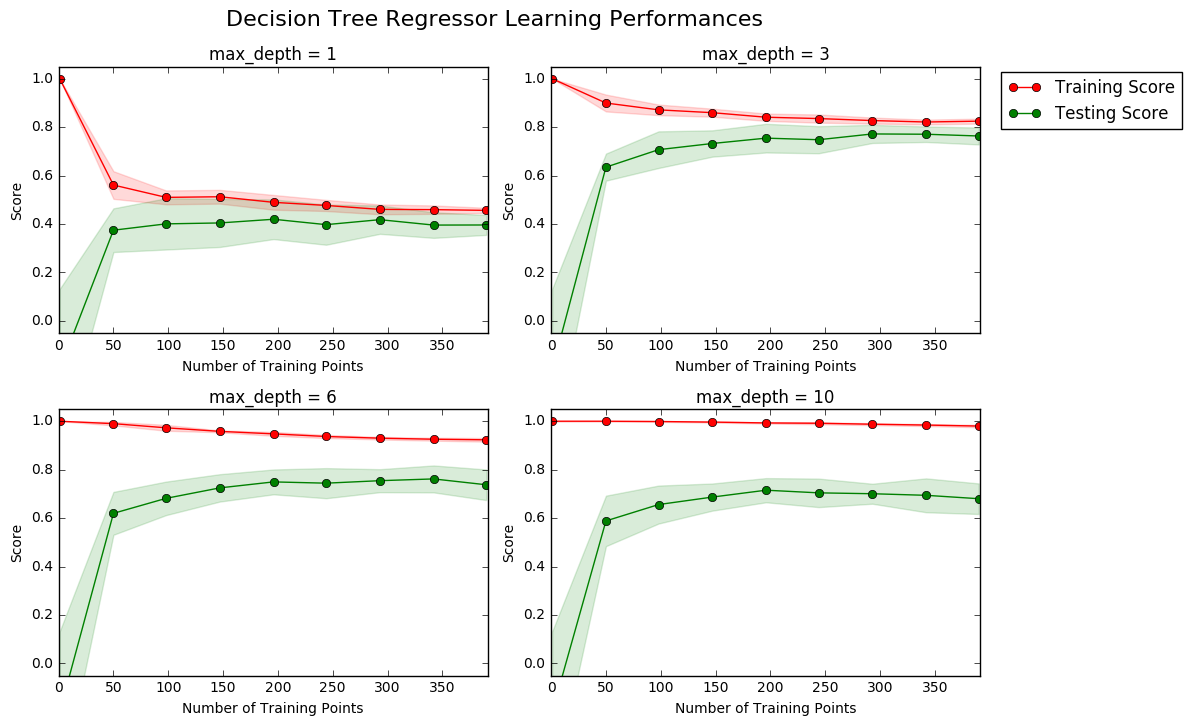

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data


Let's analyse the graph with max_depth = 1 (we can select any of them) 
 
By looking at the training curve, we can clearly see that as more data points are added, the training score reduces and hence the training error increases. Similarly, by increasing the number of data points for testing, the testing score increases till about 200 points and then almost runs parallel to the training score curve.

As both the curves seem to flatten and run parallel to each other as more and more points are added, having more training points will have no/very less effect on the model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


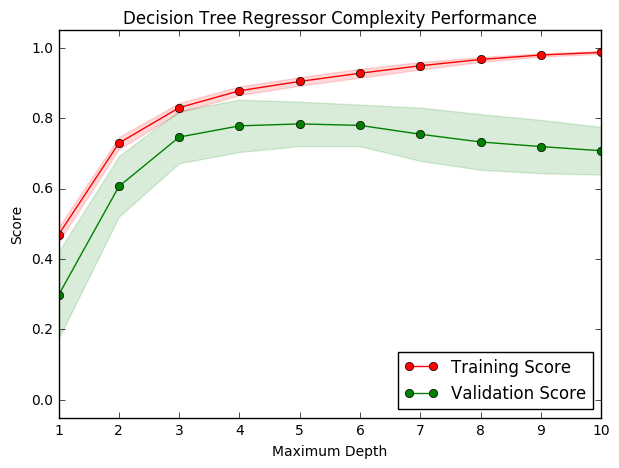

In [7]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff


We can observe the following:

With a **maximum depth of 1**, the model has a training score of about 0.5 and a validation score of about 0.3. As both the training as well as the validation score have a low value, the model is suffering from underfitting or **high bias**

With a **maximum depth of 10**, the model has a training score of almost 1.0 and a validation score of about 0.7. Here, the model seems to be overfitting as though the training score is 1.0 but the validation score is lower when compared to the validation scores of other depths. Thus, the model seems to be suffering with **high variance** as it remembers the training data very well.

### Best-Guess Optimal Model



The maximum depth of 4 seems to give the best generalized model for the unseen data.

Below this, at a depth of 1 and 2, the model seems to have high bias (underfitted), whereas for the model with maximum depth of 3 the validation score as well as the training score is less than that for model with maximum depth of 4. Moreover, at depth > 4, the validation and training score curves seem to diverge from each other, which may probably be due to overfitting.

So, in my opinion, the model with maximum depth of 4 best generalizes to the unseen data.

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search

**Q:** We will be using grid search for this. What is the grid search technique?

**A:** Grid search technique is a technique of training various models based on one or more hyper-parameters and then cross-validating each one of them, with the cross-validation dataset, to get the optimal values for the the hyper-parameters based on scoring metrics. After this, we can test the choosen model to see if it is indeed a good model or not.

For example, let's say we have to make a SVM model. To get the best possible model, we need to decide on a value for the hyper-parameters, kernel ('linear','poly','rbf',etc.) and C(float value). So to get the optimal value, we can entail a grid of models with the varying values of kernel and C being used in combination, like models of (C=0.1,kernel='rbf'), (C=1,kernel='rbf'),  (C=10,kernel='rbf'), (C=0.1,kernel='poly'), (C=1,kernel='poly') and (C=10,kernel='poly'). After this, we can cross-validate all these models to get a scoring metric like f0.5-score for each of them, and then select the value of C and kernel based on the model with the highest f0.5-score.

So, we can say the end goal of this technique is to optimize our learning algorithm by helping us decide the best hyper-parameters.

### Cross-Validation

**Q:** What is the k-fold cross-validation training technique? 

**A:** k-fold cross-validation technique allows us to recycle our data. This is done by breaking our data into k-buckets and then training our model k-times, each time choosing a different bucket as a testing set and the remaing k-1 buckets as our training set. After this, we average the results obtained to get a final model.

This techique when applied to the grid search technique will further help in optimizing our models as the hyper-parameters being selected will again be optimized by running it k-times against varying training and cross-validation sets and thus getting a more fine-tuned model.

###  Fitting a Model
Our final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. 

In addition, we will do an implementation that is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in above, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. 


In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor,param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

###  Optimal Model

**Q:** What maximum depth does the optimal model have? How does this result compare to our guess above?  


In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.



**A: **
The model predicts that a maximum depth of 5 will be optimal, while I had intuitively determined that a maximum depth of 4 will be optimal. The difference between the predictions may be because of the model being better optimized after going through the grid search and k-fold cross validation algorithms.

###  Predicting Selling Prices
Imagine that we were a real estate agent in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 


In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $419,700.00
Predicted selling price for Client 2's home: $287,100.00
Predicted selling price for Client 3's home: $927,500.00


**A: **

Statistics for Boston housing dataset:

Minimum price: $105,000.00

Maximum price: $1,024,800.00

Mean price: $454,342.94

Median price $438,900.00

Standard deviation of prices: $165,340.28

(as calculated in the Data Exploration section)

In [11]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


The selling price for the Client 1's home is predicted at $419,700.00. The house features are as follows: the number of rooms are about 2 standard deviation less than the mean, the neighbourhood poverty level is about 0.57 standard deviation above the mean and the student-teacher ratio is about 1.5 standard deviation below the mean. While the price predicted is about 0.2 standard deviations below the mean. With the inference being that higher number of rooms, lower poverty level and lower student-teacher ratio leads to a higher price, I'd say that the model is predicting the values slightly higher than what they should be, but it can be that the student-teacher ratio plays a critical factor in the predictions and hence played a dominant role.

To verify this, let's look at the predictions made for Client 2's home. The model priced it at $287,100.00. With the number of rooms being 3.5 standard deviation below the mean, the lower poverty level being 2.72 standard deviation above mean and the student-teacher ratio being 1.6 standard deviation above the mean, the predicted price is about 1 standard deviation below the mean which may sound less but it is also only about 1 standard deviation above the minimum valued house and hence seems to be a good prediction. But we still did not get an intuition about the dominance of the student-teacher ratio feature, let's have a look at Client 3's home to see if the same can be inferred.

The selling price for Client 3's home is predicted at $927,500.00. The house features are as follows: the number of rooms is about 2.75 standard deviation above the mean, the neighbourhood poverty level is about 1.4 standard deviation below the mean and the student-teacher ratio is about 3 standard deviation below the mean. The price of house is 2.87 standard deviation above the mean and about 0.58 standard deviation below the maximum. The model seems to predict a good prediction based on the above. Also, we do understand that the student-teacher ration feature does play a prominent role in the prices and thus the first prediction seems to be good.

Therefore, the predictions made above seems to be good and consistent.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


###  Applicability

**Q:** Should the constructed model be used in a real-world setting or not?  

**A:**
In my opinion, the model should not be used in a real-world setting, as it seems to be giving a very high range of variablity ($73,357.39) in the house price prediction when using different training and testing sets. Thus, the model is not robust enough to be used in a real-world setting.

This variability can be due to various factors, one being that the model is too simple, as it only uses 3 features to predict the house prices while the house prices can depend on a lot of other factors such as the footage area of the house, distance to the nearest hospital, number of available modes of public transport, etc. 

Moreover, the data was collected in 1978 and hence the values of the features near the houses such as student-teacher ratio,  lower poverty level must have changed over the years. Similarly, the prices for the houses must also be accounted for inflation.

The model would also have to account for city wide factors such as availabiliy of drinking water from rivers, availability of bullet trains, chief occupation of the workers in the neighbourhood, etc. to be robus enough to be applied to every city and hence should not be used in a real-world setting.